In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")


In [4]:
train_path = r"C:\Users\abdul\Desktop\mlopsproject\data\processed\merged_hospitals"
test_path  = r"C:\Users\abdul\Desktop\mlopsproject\data\processed\eval\manual_fedavg_test_predictions.csv"

# Load all merged client files
import os
train_files = [os.path.join(train_path, f) for f in os.listdir(train_path) if f.endswith(".csv")]
df_train = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

# Load test/prediction data
df_test = pd.read_csv(test_path)

print("Training shape:", df_train.shape)
print("Test shape:", df_test.shape)


Training shape: (507, 8)
Test shape: (102, 7)


In [5]:
FEATURE_COLS = ["HeartRate", "Temp", "PM25", "NO2", "CO_Level"]

df_train_features = df_train[FEATURE_COLS]
df_test_features  = df_test[FEATURE_COLS]


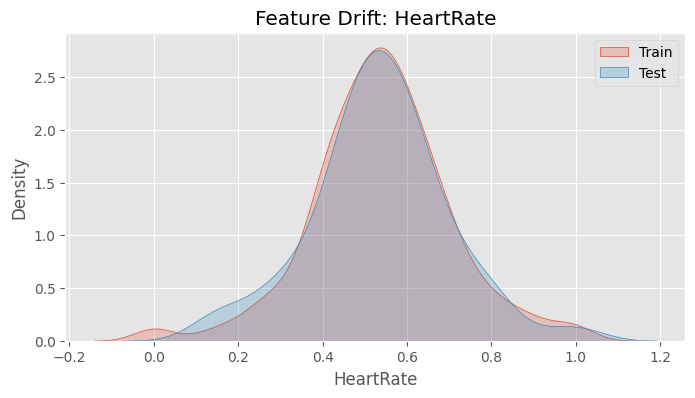

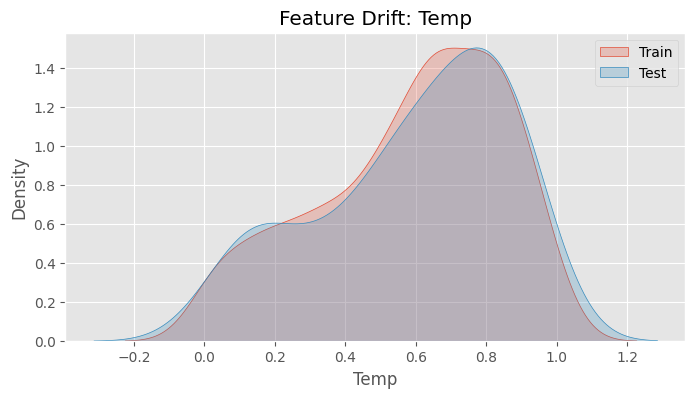

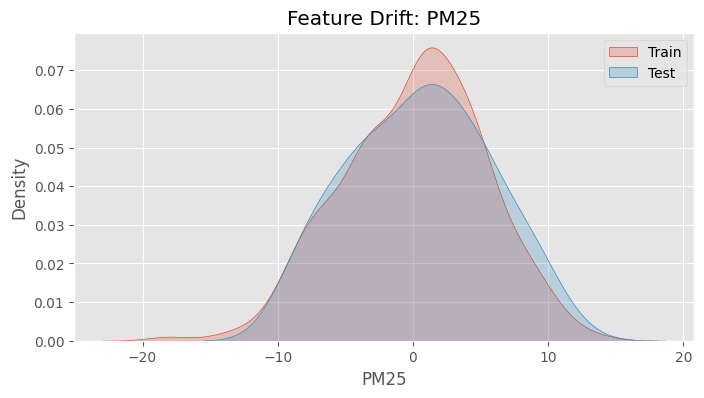

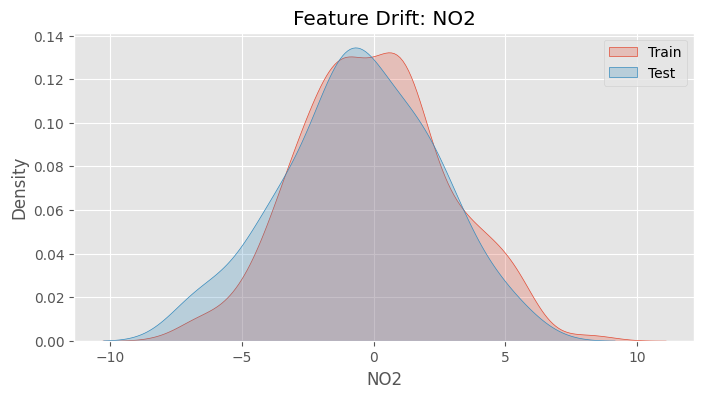

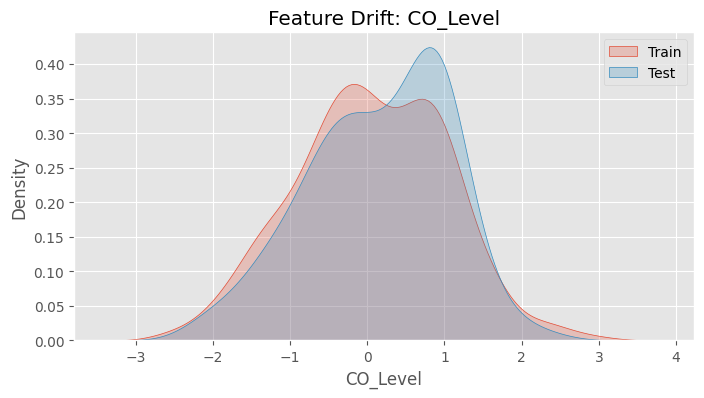

In [6]:
import matplotlib.pyplot as plt

for col in FEATURE_COLS:
    plt.figure(figsize=(8,4))
    sns.kdeplot(df_train_features[col], label="Train", fill=True)
    sns.kdeplot(df_test_features[col], label="Test", fill=True)
    plt.title(f"Feature Drift: {col}")
    plt.legend()
    plt.show()


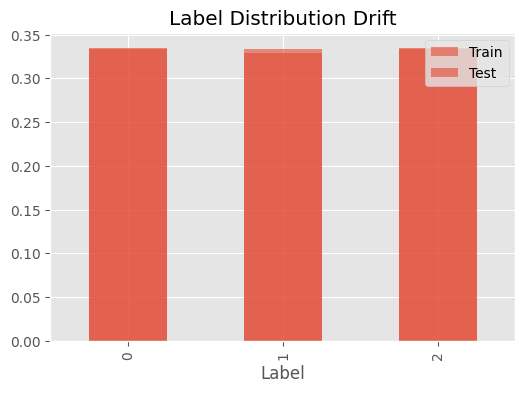

In [7]:
plt.figure(figsize=(6,4))
df_train["Label"].value_counts(normalize=True).sort_index().plot(kind="bar", alpha=0.6, label="Train")
df_test["Label"].value_counts(normalize=True).sort_index().plot(kind="bar", alpha=0.6, label="Test")
plt.title("Label Distribution Drift")
plt.legend()
plt.show()


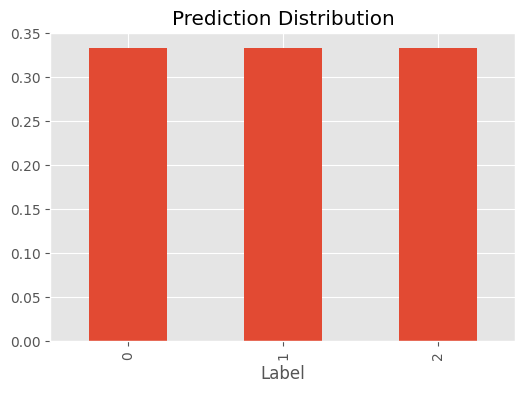

In [11]:
plt.figure(figsize=(6,4))
df_test["Label"].value_counts(normalize=True).sort_index().plot(kind='bar')
plt.title("Prediction Distribution")
plt.show()


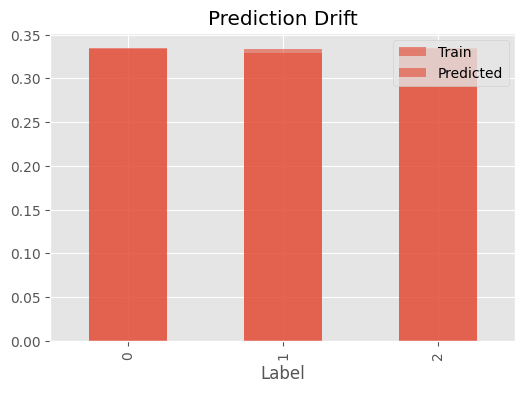

In [14]:
plt.figure(figsize=(6,4))
df_train["Label"].value_counts(normalize=True).sort_index().plot(kind="bar", label="Train", alpha=0.6)
df_test["Label"].value_counts(normalize=True).sort_index().plot(kind="bar", label="Predicted", alpha=0.6)
plt.title("Prediction Drift")
plt.legend()
plt.show()
